In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from scipy.signal import medfilt
from scipy.ndimage import median_filter
from scipy.signal import savgol_filter

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
from scipy.ndimage import median_filter
###########################
# Setup Plotting Defaults #
###########################
# For more options see https://matplotlib.org/users/customizing.html

# Commands for high detail plots (much larger in file size though)
#mpl.rcParams['agg.path.chunksize'] = 1000
#mpl.rcParams['savefig.dpi'] = 1000

# Line styles
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['lines.antialiased'] = True
mpl.rcParams['lines.dashed_pattern'] = 2.8, 1.5
mpl.rcParams['lines.dashdot_pattern'] = 4.8, 1.5, 0.8, 1.5
mpl.rcParams['lines.dotted_pattern'] = 1.1, 1.1
mpl.rcParams['lines.scale_dashes'] = True

# Default colors
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler('color',['cornflowerblue','forestgreen','maroon','goldenrod','firebrick','mediumorchid', 'navy', 'brown'])


# Fonts
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Helvetica'
mpl.rcParams['font.sans-serif'] = 'CMU Sans Serif, DejaVu Sans, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif'
mpl.rcParams['text.usetex'] = True

# Axes
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['axes.labelsize'] = 24
mpl.rcParams['axes.labelpad'] = 10.0
                                                  
                                                  
# Tick marks - the essence of life
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.75
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.75
mpl.rcParams['ytick.major.pad'] = 8
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.minor.visible'] = True

# Legend
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.framealpha'] = 0.8
#mpl.rcParams['legend.edgecolor'] = 'black'
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.borderpad'] = 0.4 # border whitespace
mpl.rcParams['legend.labelspacing'] = 0.5 # the vertical space between the legend entries
mpl.rcParams['legend.handlelength'] = 1.5 # the length of the legend lines
mpl.rcParams['legend.handleheight'] = 0.7 # the height of the legend handle
mpl.rcParams['legend.handletextpad'] = 0.5 # the space between the legend line and legend text
mpl.rcParams['legend.borderaxespad'] = 0.5 # the border between the axes and legend edge
mpl.rcParams['legend.columnspacing'] = 2.0 # column separation


# Figure size
#mpl.rcParams['figure.figsize'] = 10, 6

# Save details
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.pad_inches'] = 0.1
import matplotlib.patches as patches

std_const = np.loadtxt("/Users/samuelwitte/Dropbox/BlackHoleSpins_Witte.txt")

In [2]:
from scipy.signal import savgol_filter

def get_lim(tf, wdw=10, ordd=3, thresh=np.log10(1e17), x1cut=-1e100, x2cut=1e100):
    
    x1 = tf[:,0] >= x1cut
    x2 = tf[:,0] <= x2cut

    xhat = tf[np.all(np.column_stack((x1,x2)),axis=1),0]
    tf = tf[np.all(np.column_stack((x1,x2)),axis=1),1]

    xhat = xhat[tf < thresh]
    tf_new = tf[tf < thresh]
    
    
    yhat = savgol_filter(tf_new, wdw, ordd) # window size 51, polynomial order 3
    
    yhat = np.insert(yhat, 0, 21)
    yhat = np.append(yhat, 21)

    xhat = np.insert(xhat, 0, xhat[0] * 0.99)
    xhat = np.append(xhat, xhat[-1] * 1.01)
    
    return xhat, yhat
    

In [3]:
t2= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_1.0e6_Nmax_3__FullRel__KDE_.dat")

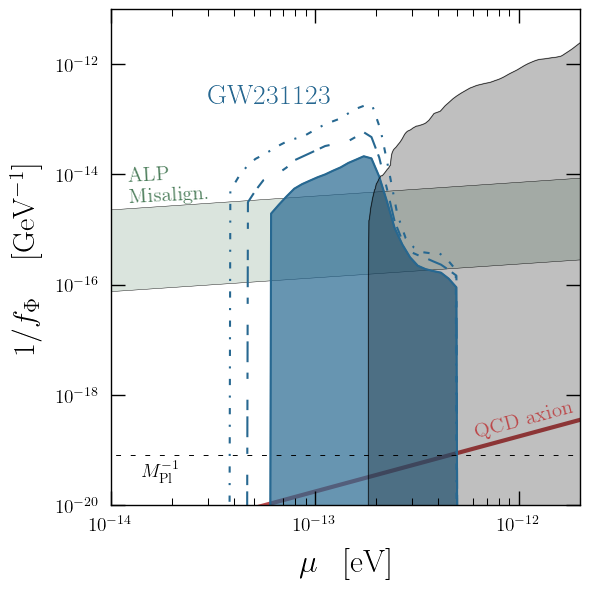

In [174]:
t2= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_1.0e6_Nmax_3__FullRel__KDE_.dat")
t11= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_1.0e7_Nmax_3__FullRel__KDE_.dat")
t9= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_100000.0_Nmax_3__FullRel__KDE_.dat")


fig, axs = plt.subplots(1, figsize=(6,6))
axs.set_yscale("log")
axs.set_xscale("log")

axs.set_ylim([1e-20, 1e-11])
axs.set_xlim([1e-14, 2e-12])


axs.set_ylabel(r"$1/f_\Phi$  \, \, [GeV$^{-1}$]", fontsize=22)
axs.set_xlabel(r"$\mu$ \,  [eV] ", fontsize=23)

# axs.plot(t1[:,0], 1/10**t1[:,1], c="#084C61")
# axs.plot(t2[:,0], 1/10**t2[:,1], c="#DB3A34")
#axs.plot(t3[:,0], 1/10**t3[:,1], c="#276891", lw=1.5)
#axs.fill_between(t3[:,0], 1/10**t3[:,1], np.zeros_like(t3[:,1]), color='#276891', alpha=0.7)

wdw=3
ordd=1

# axs.plot(t2[:,0], 1/10**t2[:,1], c="k")
x2x, y2x = get_lim(t9, wdw=wdw, ordd=ordd)
axs.plot(x2x, 1/10**y2x, c="#276891", lw=1.5)
axs.fill_between(x2x, 1/10**y2x, np.zeros_like(y2x), color='#276891', alpha=0.7)

wdw=3
ordd=1

x2x, y2x = get_lim(t11, wdw=wdw, ordd=ordd)
axs.plot(x2x, 1/10**y2x, c="#276891", lw=1.5, ls=(0, (3, 5, 1, 5)))

wdw=3
ordd=1
x2x, y2x = get_lim(t2, wdw=wdw, ordd=ordd)
axs.plot(x2x, 1/10**y2x, c="#276891", lw=1.5, ls=(0, (5, 10, 3)))


axs.fill_between(std_const[:,0], std_const[:,1], np.zeros_like(std_const[:,1]), color='k', alpha=0.25)
axs.plot(std_const[:,0], std_const[:,1], c="k", lw=0.4)


EMD_lower = 1.448226539542627e-19*2*np.pi*137
EMD_upper = 2.6761051177154226e-18*2*np.pi*137
#ax.fill_between([1e-14, 1e-10],[EMD_upper,EMD_upper],[EMD_lower,EMD_lower],color='#8596c7',alpha=1,zorder=-100,edgecolor='k',lw=.8)

alPA=0.2
# Post-inflation ALP
def ALP_n0(m,theta_i=2.33,gstar_T1=90):
    fa_inv = np.sqrt(2*theta_i**2)/1.9e13*(m/1e-6)**(1/4)*(90/gstar_T1)**(1/8)
    return fa_inv

m = np.logspace(-14, -10, 1000)
eps = 0.1
axs.fill_between(m, ALP_n0(m,theta_i=0.1),ALP_n0(m,theta_i=np.pi-0.1),color='#4A7C59',alpha=alPA,lw=0,zorder=-10)
axs.plot(m,ALP_n0(m,theta_i=0.1),'k',lw=.3,zorder=-10)
axs.plot(m,ALP_n0(m,theta_i=np.pi-0.1),'k',lw=.3,zorder=-10)


def ALP_Cogenesis(m,C_agamma=1,T_EW=130,cb=0.1):
    g = C_agamma*1.8e-11*(0.1/cb)**0.5*(m/1e-3)**0.5*(130/T_EW)
    return g


shft=1.12
plt.plot(m,1/(1e12*(5.7e-6/m)),lw=3,color='#BC4749',zorder=-10,solid_capstyle='round', alpha=1)

axs.text(1.2e-14, 10**-14.5, "ALP \n Misalign.", fontsize=15, c="#4A7C59", rotation=3);
axs.text(6.0e-13, 1.7 * 10**-19, r"QCD axion", fontsize=15, c="#BC4749", rotation=15, zorder=11);

axs.text(3e-14, 2 * 10**-13, r"GW231123", c="#276891", fontsize=20)

axs.plot([1e-16, 1e-11],[1/1.22e19, 1/1.22e19], c="k", ls=(0, (5, 10)), lw=.7)
# axs.text(4e-13, 10**-12.1, r"X-rays", c="k", fontsize=19)
axs.text(1.4e-14, 10**-19/3, r"$M_{\rm Pl}^{-1}$", c="k", fontsize=14)

plt.tight_layout()
plt.savefig("Main_GW231123.jpeg", dpi=200)

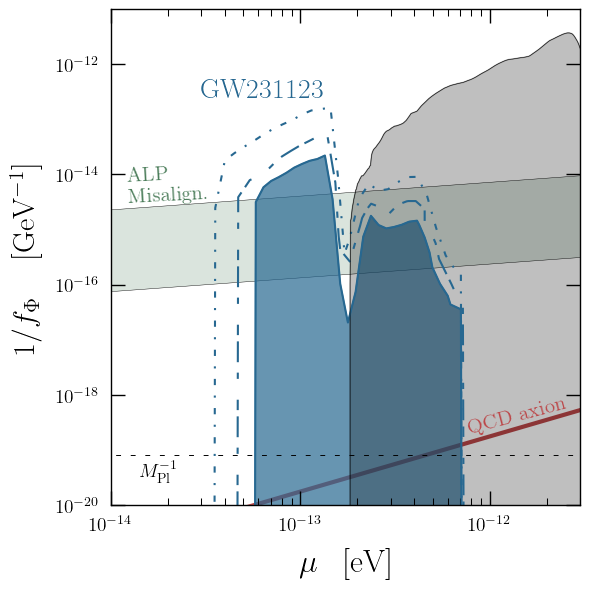

In [164]:
t2= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_1.0e6_Nmax_5__FullRel__KDE_.dat")
t11= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_1.0e7_Nmax_5__FullRel__KDE_.dat")
t9= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_100000.0_Nmax_5__FullRel__KDE_.dat")


fig, axs = plt.subplots(1, figsize=(6,6))
axs.set_yscale("log")
axs.set_xscale("log")

axs.set_ylim([1e-20, 1e-11])
axs.set_xlim([1e-14, 3e-12])


axs.set_ylabel(r"$1/f_\Phi$  \, \, [GeV$^{-1}$]", fontsize=22)
axs.set_xlabel(r"$\mu$ \,  [eV] ", fontsize=23)

# axs.plot(t1[:,0], 1/10**t1[:,1], c="#084C61")
# axs.plot(t2[:,0], 1/10**t2[:,1], c="#DB3A34")
#axs.plot(t3[:,0], 1/10**t3[:,1], c="#276891", lw=1.5)
#axs.fill_between(t3[:,0], 1/10**t3[:,1], np.zeros_like(t3[:,1]), color='#276891', alpha=0.7)

wdw=2
ordd=1

# axs.plot(t2[:,0], 1/10**t2[:,1], c="k")
x2x, y2x = get_lim(t9, wdw=wdw, ordd=ordd)
axs.plot(x2x, 1/10**y2x, c="#276891", lw=1.5)
axs.fill_between(x2x, 1/10**y2x, np.zeros_like(y2x), color='#276891', alpha=0.7)

wdw=2
ordd=1

x2x, y2x = get_lim(t11, wdw=wdw, ordd=ordd)
axs.plot(x2x, 1/10**y2x, c="#276891", lw=1.5, ls=(0, (3, 5, 1, 5)))


wdw=2
ordd=1
x2x, y2x = get_lim(t2, wdw=wdw, ordd=ordd)
axs.plot(x2x, 1/10**y2x, c="#276891", lw=1.5, ls=(0, (5, 10, 3)))
# axs.plot(x2x, 1/10**y2x, c="#276891", lw=1.5)

axs.fill_between(std_const[:,0], std_const[:,1], np.zeros_like(std_const[:,1]), color='k', alpha=0.25)
axs.plot(std_const[:,0], std_const[:,1], c="k", lw=0.4)


EMD_lower = 1.448226539542627e-19*2*np.pi*137
EMD_upper = 2.6761051177154226e-18*2*np.pi*137
#ax.fill_between([1e-14, 1e-10],[EMD_upper,EMD_upper],[EMD_lower,EMD_lower],color='#8596c7',alpha=1,zorder=-100,edgecolor='k',lw=.8)

alPA=0.2
# Post-inflation ALP
def ALP_n0(m,theta_i=2.33,gstar_T1=90):
    fa_inv = np.sqrt(2*theta_i**2)/1.9e13*(m/1e-6)**(1/4)*(90/gstar_T1)**(1/8)
    return fa_inv

m = np.logspace(-14, -10, 1000)
eps = 0.1
axs.fill_between(m, ALP_n0(m,theta_i=0.1),ALP_n0(m,theta_i=np.pi-0.1),color='#4A7C59',alpha=alPA,lw=0,zorder=-10)
axs.plot(m,ALP_n0(m,theta_i=0.1),'k',lw=.3,zorder=-10)
axs.plot(m,ALP_n0(m,theta_i=np.pi-0.1),'k',lw=.3,zorder=-10)


def ALP_Cogenesis(m,C_agamma=1,T_EW=130,cb=0.1):
    g = C_agamma*1.8e-11*(0.1/cb)**0.5*(m/1e-3)**0.5*(130/T_EW)
    return g


shft=1.12
plt.plot(m,1/(1e12*(5.7e-6/m)),lw=3,color='#BC4749',zorder=-10,solid_capstyle='round', alpha=1)

axs.text(1.2e-14, 10**-14.5, "ALP \n Misalign.", fontsize=15, c="#4A7C59", rotation=3);
axs.text(7.5e-13, 2 * 10**-19, r"QCD axion", fontsize=15, c="#BC4749", rotation=15, zorder=11);

axs.text(3e-14, 2.5 * 10**-13, r"GW231123", c="#276891", fontsize=20)

axs.plot([1e-16, 1e-11],[1/1.22e19, 1/1.22e19], c="k", ls=(0, (5, 10)), lw=.7)
# axs.text(4e-13, 10**-12.1, r"X-rays", c="k", fontsize=19)
axs.text(1.4e-14, 10**-19/3, r"$M_{\rm Pl}^{-1}$", c="k", fontsize=14)

plt.tight_layout()
plt.savefig("Main_Nmax5_GW231123.jpeg", dpi=200)

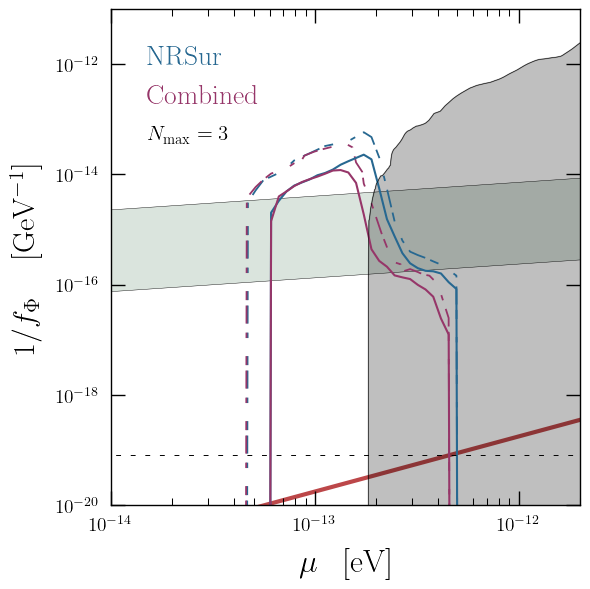

In [172]:
t2= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_1.0e6_Nmax_3__FullRel__KDE_.dat")
t5= np.loadtxt("Lim_LIGO_GW231123_TauMax_1.0e6_Nmax_3__FullRel__KDE_.dat")
t11= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_1.0e7_Nmax_3__FullRel__KDE_.dat")
t12= np.loadtxt("Lim_LIGO_GW231123_TauMax_1.0e7_Nmax_3__FullRel__KDE_.dat")

t9= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_100000.0_Nmax_3__FullRel__KDE_.dat")
t10= np.loadtxt("Lim_LIGO_GW231123_TauMax_100000.0_Nmax_3__FullRel__KDE_.dat")

fig, axs = plt.subplots(1, figsize=(6,6))
axs.set_yscale("log")
axs.set_xscale("log")

axs.set_ylim([1e-20, 1e-11])
axs.set_xlim([1e-14, 2e-12])


axs.set_ylabel(r"$1/f_\Phi$  \, \, [GeV$^{-1}$]", fontsize=22)
axs.set_xlabel(r"$\mu$ \,  [eV] ", fontsize=23)

# axs.plot(t1[:,0], 1/10**t1[:,1], c="#084C61")
# axs.plot(t2[:,0], 1/10**t2[:,1], c="#DB3A34")
#axs.plot(t3[:,0], 1/10**t3[:,1], c="#276891", lw=1.5)
#axs.fill_between(t3[:,0], 1/10**t3[:,1], np.zeros_like(t3[:,1]), color='#276891', alpha=0.7)

wdw=3
ordd=1

# axs.plot(t2[:,0], 1/10**t2[:,1], c="k")
x2x, y2x = get_lim(t2, wdw=wdw, ordd=ordd)
axs.plot(x2x, 1/10**y2x,  c="#276891", lw=1.3, ls=(0, (5, 10, 3)))

wdw=2
ordd=1

x2x, y2x = get_lim(t5, wdw=wdw, ordd=ordd)
axs.plot(x2x, 1/10**y2x,  c="#963669", lw=1.3, ls=(0, (5, 10, 3)))

wdw=2
ordd=1

# x2x, y2x = get_lim(t11, wdw=wdw, ordd=ordd)
#axs.plot(x2x, 1/10**y2x,  c="#276891", lw=1.3)

# x2x, y2x = get_lim(t12, wdw=wdw, ordd=ordd)
# axs.plot(x2x, 1/10**y2x,  c="#963669", lw=1.3)

x2x, y2x = get_lim(t9, wdw=wdw, ordd=ordd)
axs.plot(x2x, 1/10**y2x,  c="#276891", lw=1.5 )#, ls=(0, (3, 5, 1, 5)))

x2x, y2x = get_lim(t10, wdw=wdw, ordd=ordd)
axs.plot(x2x, 1/10**y2x,  c="#963669", lw=1.5 )#, ls=(0, (3, 5, 1, 5)))





#axs.fill_between(x2x, 1/10**y2x, np.zeros_like(y2x), color='#276891', alpha=0.7)


axs.fill_between(std_const[:,0], std_const[:,1], np.zeros_like(std_const[:,1]), color='k', alpha=0.25)
axs.plot(std_const[:,0], std_const[:,1], c="k", lw=0.4)


EMD_lower = 1.448226539542627e-19*2*np.pi*137
EMD_upper = 2.6761051177154226e-18*2*np.pi*137
#ax.fill_between([1e-14, 1e-10],[EMD_upper,EMD_upper],[EMD_lower,EMD_lower],color='#8596c7',alpha=1,zorder=-100,edgecolor='k',lw=.8)

alPA=0.2
# Post-inflation ALP
def ALP_n0(m,theta_i=2.33,gstar_T1=90):
    fa_inv = np.sqrt(2*theta_i**2)/1.9e13*(m/1e-6)**(1/4)*(90/gstar_T1)**(1/8)
    return fa_inv

m = np.logspace(-14, -10, 1000)
eps = 0.1
axs.fill_between(m, ALP_n0(m,theta_i=0.1),ALP_n0(m,theta_i=np.pi-0.1),color='#4A7C59',alpha=alPA,lw=0,zorder=-10)
axs.plot(m,ALP_n0(m,theta_i=0.1),'k',lw=.3,zorder=-10)
axs.plot(m,ALP_n0(m,theta_i=np.pi-0.1),'k',lw=.3,zorder=-10)


def ALP_Cogenesis(m,C_agamma=1,T_EW=130,cb=0.1):
    g = C_agamma*1.8e-11*(0.1/cb)**0.5*(m/1e-3)**0.5*(130/T_EW)
    return g


shft=1.12
plt.plot(m,1/(1e12*(5.7e-6/m)),lw=3,color='#BC4749',zorder=-10,solid_capstyle='round', alpha=1)

# axs.text(1.2e-14, 10**-14.5, "ALP \n Misalign.", fontsize=15, c="#4A7C59", rotation=3);
# axs.text(5.0e-13, 1.7 * 10**-19, r"QCD axion", fontsize=15, c="#BC4749", rotation=15, zorder=11);

axs.text(1.5e-14, 10**-12, r"NRSur", c="#276891", fontsize=20)
axs.text(1.5e-14, 2 * 10**-13, r"Combined", c="#963669", fontsize=20)
axs.text(1.5e-14, 4 * 10**-14, r"$N_{\rm max} = 3$", c="k", fontsize=15)

axs.plot([1e-16, 1e-11],[1/1.22e19, 1/1.22e19], c="k", ls=(0, (5, 10)), lw=.7)
# axs.text(4e-13, 10**-12.1, r"X-rays", c="k", fontsize=19)
# axs.text(1.4e-14, 10**-19/3, r"$M_{\rm Pl}^{-1}$", c="k", fontsize=14)

plt.tight_layout()
plt.savefig("WF_analysis.jpeg", dpi=200)

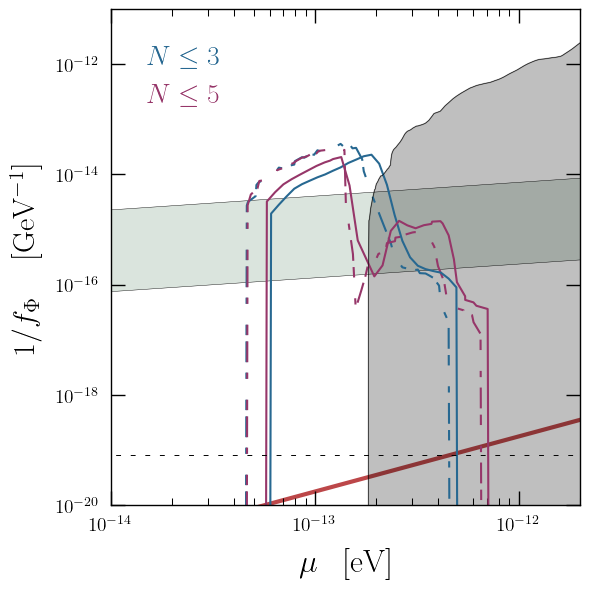

In [63]:
t5= np.loadtxt("Lim_LIGO_GW231123_TauMax_1.0e6_Nmax_3__FullRel__KDE_.dat")
t7= np.loadtxt("Lim_LIGO_GW231123_TauMax_1.0e6_Nmax_5__FullRel__KDE_.dat")


# t11= np.loadtxt("Lim_LIGO_GW231123_TauMax_1.0e7_Nmax_3__FullRel__KDE_.dat")
# t12= np.loadtxt("Lim_LIGO_GW231123_TauMax_1.0e7_Nmax_5__FullRel__KDE_.dat")

t9= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_100000.0_Nmax_3__FullRel__KDE_.dat")
t15= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_100000.0_Nmax_5__FullRel__KDE_.dat")


fig, axs = plt.subplots(1, figsize=(6,6))
axs.set_yscale("log")
axs.set_xscale("log")

axs.set_ylim([1e-20, 1e-11])
axs.set_xlim([1e-14, 2e-12])


axs.set_ylabel(r"$1/f_\Phi$  \, \, [GeV$^{-1}$]", fontsize=22)
axs.set_xlabel(r"$\mu$ \,  [eV] ", fontsize=23)

# axs.plot(t1[:,0], 1/10**t1[:,1], c="#084C61")
# axs.plot(t2[:,0], 1/10**t2[:,1], c="#DB3A34")
#axs.plot(t3[:,0], 1/10**t3[:,1], c="#276891", lw=1.5)
#axs.fill_between(t3[:,0], 1/10**t3[:,1], np.zeros_like(t3[:,1]), color='#276891', alpha=0.7)

wdw=3
ordd=1
lw=1.5

# axs.plot(t2[:,0], 1/10**t2[:,1], c="k")
x2x, y2x = get_lim(t5, wdw=wdw, ordd=ordd)
axs.plot(x2x, 1/10**y2x,  c="#276891", lw=lw, ls=(0, (5, 10, 3)))

x2x, y2x = get_lim(t7, wdw=wdw, ordd=ordd)
axs.plot(x2x, 1/10**y2x,  c="#963669", lw=lw, ls=(0, (5, 10, 3)))

# x2x, y2x = get_lim(t11, wdw=wdw, ordd=ordd)
#axs.plot(x2x, 1/10**y2x,  c="#276891", lw=lw)

# x2x, y2x = get_lim(t12, wdw=wdw, ordd=ordd)
# axs.plot(x2x, 1/10**y2x,  c="#963669", lw=lw)


x2x, y2x = get_lim(t9, wdw=wdw, ordd=ordd)
axs.plot(x2x, 1/10**y2x,  c="#276891", lw=lw)

x2x, y2x = get_lim(t15, wdw=wdw, ordd=ordd)
axs.plot(x2x, 1/10**y2x,  c="#963669", lw=lw)




#axs.fill_between(x2x, 1/10**y2x, np.zeros_like(y2x), color='#276891', alpha=0.7)


axs.fill_between(std_const[:,0], std_const[:,1], np.zeros_like(std_const[:,1]), color='k', alpha=0.25)
axs.plot(std_const[:,0], std_const[:,1], c="k", lw=0.4)


EMD_lower = 1.448226539542627e-19*2*np.pi*137
EMD_upper = 2.6761051177154226e-18*2*np.pi*137
#ax.fill_between([1e-14, 1e-10],[EMD_upper,EMD_upper],[EMD_lower,EMD_lower],color='#8596c7',alpha=1,zorder=-100,edgecolor='k',lw=.8)

alPA=0.2
# Post-inflation ALP
def ALP_n0(m,theta_i=2.33,gstar_T1=90):
    fa_inv = np.sqrt(2*theta_i**2)/1.9e13*(m/1e-6)**(1/4)*(90/gstar_T1)**(1/8)
    return fa_inv

m = np.logspace(-14, -10, 1000)
eps = 0.1
axs.fill_between(m, ALP_n0(m,theta_i=0.1),ALP_n0(m,theta_i=np.pi-0.1),color='#4A7C59',alpha=alPA,lw=0,zorder=-10)
axs.plot(m,ALP_n0(m,theta_i=0.1),'k',lw=.3,zorder=-10)
axs.plot(m,ALP_n0(m,theta_i=np.pi-0.1),'k',lw=.3,zorder=-10)


def ALP_Cogenesis(m,C_agamma=1,T_EW=130,cb=0.1):
    g = C_agamma*1.8e-11*(0.1/cb)**0.5*(m/1e-3)**0.5*(130/T_EW)
    return g


shft=1.12
plt.plot(m,1/(1e12*(5.7e-6/m)),lw=3,color='#BC4749',zorder=-10,solid_capstyle='round', alpha=1)

# axs.text(1.2e-14, 10**-14.5, "ALP \n Misalign.", fontsize=15, c="#4A7C59", rotation=3);
# axs.text(5.0e-13, 1.7 * 10**-19, r"QCD axion", fontsize=15, c="#BC4749", rotation=15, zorder=11);

axs.text(1.5e-14, 10**-12, r"$N \leq 3$", c="#276891", fontsize=20)
axs.text(1.5e-14, 2 * 10**-13, r"$N \leq 5$", c="#963669", fontsize=20)

axs.plot([1e-16, 1e-11],[1/1.22e19, 1/1.22e19], c="k", ls=(0, (5, 10)), lw=.7)
# axs.text(4e-13, 10**-12.1, r"X-rays", c="k", fontsize=19)
# axs.text(1.4e-14, 10**-19/3, r"$M_{\rm Pl}^{-1}$", c="k", fontsize=14)

plt.tight_layout()
# plt.savefig("Nmax_analysis.jpeg", dpi=200)

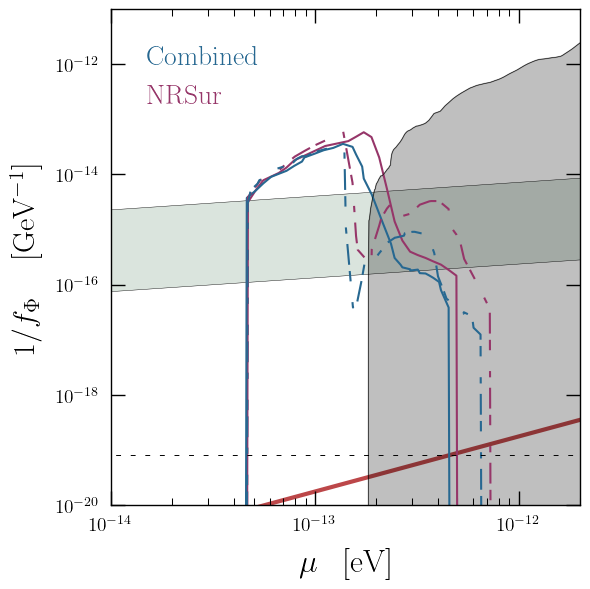

In [178]:
t2= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_1.0e6_Nmax_3__FullRel__KDE_.dat")
t4= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_1.0e6_Nmax_5__FullRel__KDE_.dat")


t5= np.loadtxt("Lim_LIGO_GW231123_TauMax_1.0e6_Nmax_3__FullRel__KDE_.dat")
t7= np.loadtxt("Lim_LIGO_GW231123_TauMax_1.0e6_Nmax_5__FullRel__KDE_.dat")

# t9= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_100000.0_Nmax_3__FullRel__KDE_.dat")
# t11= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_1.0e7_Nmax_3__FullRel__KDE_.dat")
# t13= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_1.0e7_Nmax_5__FullRel__KDE_.dat")
# t15= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_100000.0_Nmax_5__FullRel__KDE_.dat")




fig, axs = plt.subplots(1, figsize=(6,6))
axs.set_yscale("log")
axs.set_xscale("log")

axs.set_ylim([1e-20, 1e-11])
axs.set_xlim([1e-14, 2e-12])


axs.set_ylabel(r"$1/f_\Phi$  \, \, [GeV$^{-1}$]", fontsize=22)
axs.set_xlabel(r"$\mu$ \,  [eV] ", fontsize=23)

# axs.plot(t1[:,0], 1/10**t1[:,1], c="#084C61")
# axs.plot(t2[:,0], 1/10**t2[:,1], c="#DB3A34")
#axs.plot(t3[:,0], 1/10**t3[:,1], c="#276891", lw=1.5)
#axs.fill_between(t3[:,0], 1/10**t3[:,1], np.zeros_like(t3[:,1]), color='#276891', alpha=0.7)

wdw=3
ordd=1
lw=1.5

# axs.plot(t2[:,0], 1/10**t2[:,1], c="k")
x2x, y2x = get_lim(t2, wdw=wdw, ordd=ordd)
axs.plot(x2x, 1/10**y2x,  c="#963669", lw=lw)

x2x, y2x = get_lim(t5, wdw=wdw, ordd=ordd)
axs.plot(x2x, 1/10**y2x,  c="#276891", lw=lw)

wdw=2
ordd=1
lw=1.5

x2x, y2x = get_lim(t4, wdw=wdw, ordd=ordd)
axs.plot(x2x, 1/10**y2x,  c="#963669", lw=lw, ls=(0, (5, 10, 3)))


x2x, y2x = get_lim(t7, wdw=wdw, ordd=ordd)
axs.plot(x2x, 1/10**y2x,  c="#276891", lw=lw, ls=(0, (5, 10, 3)))



# x2x, y2x = get_lim(t13, wdw=wdw, ordd=ordd)
# axs.plot(x2x, 1/10**y2x,  c="k", lw=lw, ls=(0, (5, 10, 3)))



#axs.fill_between(x2x, 1/10**y2x, np.zeros_like(y2x), color='#276891', alpha=0.7)


axs.fill_between(std_const[:,0], std_const[:,1], np.zeros_like(std_const[:,1]), color='k', alpha=0.25)
axs.plot(std_const[:,0], std_const[:,1], c="k", lw=0.4)


EMD_lower = 1.448226539542627e-19*2*np.pi*137
EMD_upper = 2.6761051177154226e-18*2*np.pi*137
#ax.fill_between([1e-14, 1e-10],[EMD_upper,EMD_upper],[EMD_lower,EMD_lower],color='#8596c7',alpha=1,zorder=-100,edgecolor='k',lw=.8)

alPA=0.2
# Post-inflation ALP
def ALP_n0(m,theta_i=2.33,gstar_T1=90):
    fa_inv = np.sqrt(2*theta_i**2)/1.9e13*(m/1e-6)**(1/4)*(90/gstar_T1)**(1/8)
    return fa_inv

m = np.logspace(-14, -10, 1000)
eps = 0.1
axs.fill_between(m, ALP_n0(m,theta_i=0.1),ALP_n0(m,theta_i=np.pi-0.1),color='#4A7C59',alpha=alPA,lw=0,zorder=-10)
axs.plot(m,ALP_n0(m,theta_i=0.1),'k',lw=.3,zorder=-10)
axs.plot(m,ALP_n0(m,theta_i=np.pi-0.1),'k',lw=.3,zorder=-10)


def ALP_Cogenesis(m,C_agamma=1,T_EW=130,cb=0.1):
    g = C_agamma*1.8e-11*(0.1/cb)**0.5*(m/1e-3)**0.5*(130/T_EW)
    return g


shft=1.12
plt.plot(m,1/(1e12*(5.7e-6/m)),lw=3,color='#BC4749',zorder=-10,solid_capstyle='round', alpha=1)

# axs.text(1.2e-14, 10**-14.5, "ALP \n Misalign.", fontsize=15, c="#4A7C59", rotation=3);
# axs.text(5.0e-13, 1.7 * 10**-19, r"QCD axion", fontsize=15, c="#BC4749", rotation=15, zorder=11);

axs.text(1.5e-14, 10**-12, r"Combined", c="#276891", fontsize=20)
axs.text(1.5e-14, 2 * 10**-13, r"NRSur", c="#963669", fontsize=20)

axs.plot([1e-16, 1e-11],[1/1.22e19, 1/1.22e19], c="k", ls=(0, (5, 10)), lw=.7)
# axs.text(4e-13, 10**-12.1, r"X-rays", c="k", fontsize=19)
# axs.text(1.4e-14, 10**-19/3, r"$M_{\rm Pl}^{-1}$", c="k", fontsize=14)

plt.tight_layout()
plt.savefig("Nmax_analysis.jpeg", dpi=200)

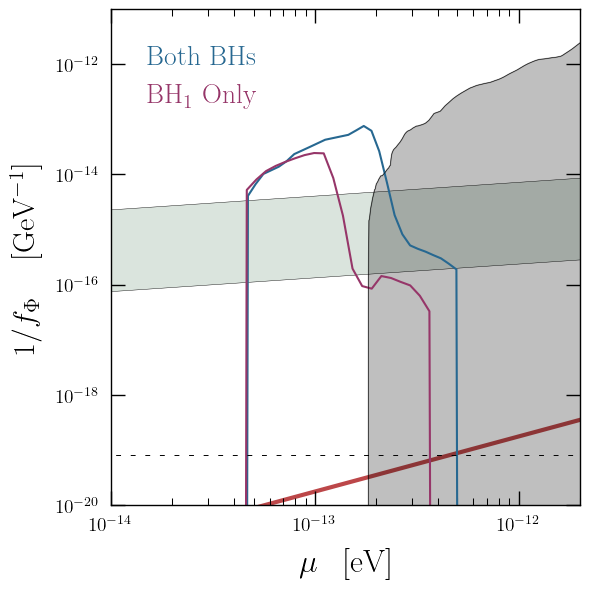

In [170]:
t2= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_1.0e6_Nmax_3__FullRel__KDE_.dat")
tOM= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_1.0e6_Nmax_3__FullRel__OneBH__KDE_.dat")


# t5= np.loadtxt("Lim_LIGO_GW231123_TauMax_1.0e6_Nmax_3__FullRel__KDE_.dat")
#t7= np.loadtxt("Lim_LIGO_GW231123_TauMax_1.0e6_Nmax_5__FullRel__KDE_.dat")

# t9= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_100000.0_Nmax_3__FullRel__KDE_.dat")
# t11= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_1.0e7_Nmax_3__FullRel__KDE_.dat")
# t13= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_1.0e7_Nmax_5__FullRel__KDE_.dat")
# t15= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_100000.0_Nmax_5__FullRel__KDE_.dat")




fig, axs = plt.subplots(1, figsize=(6,6))
axs.set_yscale("log")
axs.set_xscale("log")

axs.set_ylim([1e-20, 1e-11])
axs.set_xlim([1e-14, 2e-12])


axs.set_ylabel(r"$1/f_\Phi$  \, \, [GeV$^{-1}$]", fontsize=22)
axs.set_xlabel(r"$\mu$ \,  [eV] ", fontsize=23)

# axs.plot(t1[:,0], 1/10**t1[:,1], c="#084C61")
# axs.plot(t2[:,0], 1/10**t2[:,1], c="#DB3A34")
#axs.plot(t3[:,0], 1/10**t3[:,1], c="#276891", lw=1.5)
#axs.fill_between(t3[:,0], 1/10**t3[:,1], np.zeros_like(t3[:,1]), color='#276891', alpha=0.7)

wdw=3
ordd=1
lw=1.5

# axs.plot(t2[:,0], 1/10**t2[:,1], c="k")
x2x, y2x = get_lim(t2, wdw=wdw, ordd=ordd)
axs.plot(x2x, 1/10**y2x*1.3  ,  c="#276891", lw=lw)

x2x, y2x = get_lim(tOM, wdw=wdw, ordd=ordd)
axs.plot(x2x, 1/10**y2x,  c="#963669", lw=lw)



# x2x, y2x = get_lim(t13, wdw=wdw, ordd=ordd)
# axs.plot(x2x, 1/10**y2x,  c="k", lw=lw, ls=(0, (5, 10, 3)))



#axs.fill_between(x2x, 1/10**y2x, np.zeros_like(y2x), color='#276891', alpha=0.7)


axs.fill_between(std_const[:,0], std_const[:,1], np.zeros_like(std_const[:,1]), color='k', alpha=0.25)
axs.plot(std_const[:,0], std_const[:,1], c="k", lw=0.4)


EMD_lower = 1.448226539542627e-19*2*np.pi*137
EMD_upper = 2.6761051177154226e-18*2*np.pi*137
#ax.fill_between([1e-14, 1e-10],[EMD_upper,EMD_upper],[EMD_lower,EMD_lower],color='#8596c7',alpha=1,zorder=-100,edgecolor='k',lw=.8)

alPA=0.2
# Post-inflation ALP
def ALP_n0(m,theta_i=2.33,gstar_T1=90):
    fa_inv = np.sqrt(2*theta_i**2)/1.9e13*(m/1e-6)**(1/4)*(90/gstar_T1)**(1/8)
    return fa_inv

m = np.logspace(-14, -10, 1000)
eps = 0.1
axs.fill_between(m, ALP_n0(m,theta_i=0.1),ALP_n0(m,theta_i=np.pi-0.1),color='#4A7C59',alpha=alPA,lw=0,zorder=-10)
axs.plot(m,ALP_n0(m,theta_i=0.1),'k',lw=.3,zorder=-10)
axs.plot(m,ALP_n0(m,theta_i=np.pi-0.1),'k',lw=.3,zorder=-10)


def ALP_Cogenesis(m,C_agamma=1,T_EW=130,cb=0.1):
    g = C_agamma*1.8e-11*(0.1/cb)**0.5*(m/1e-3)**0.5*(130/T_EW)
    return g


shft=1.12
plt.plot(m,1/(1e12*(5.7e-6/m)),lw=3,color='#BC4749',zorder=-10,solid_capstyle='round', alpha=1)

# axs.text(1.2e-14, 10**-14.5, "ALP \n Misalign.", fontsize=15, c="#4A7C59", rotation=3);
# axs.text(5.0e-13, 1.7 * 10**-19, r"QCD axion", fontsize=15, c="#BC4749", rotation=15, zorder=11);

axs.text(1.5e-14, 10**-12, r"Both BHs", c="#276891", fontsize=20)
axs.text(1.5e-14, 2 * 10**-13, r"${\rm BH}_1$ Only", c="#963669", fontsize=20)

axs.plot([1e-16, 1e-11],[1/1.22e19, 1/1.22e19], c="k", ls=(0, (5, 10)), lw=.7)
# axs.text(4e-13, 10**-12.1, r"X-rays", c="k", fontsize=19)
# axs.text(1.4e-14, 10**-19/3, r"$M_{\rm Pl}^{-1}$", c="k", fontsize=14)

plt.tight_layout()
plt.savefig("OneBH_analysis.jpeg", dpi=200)

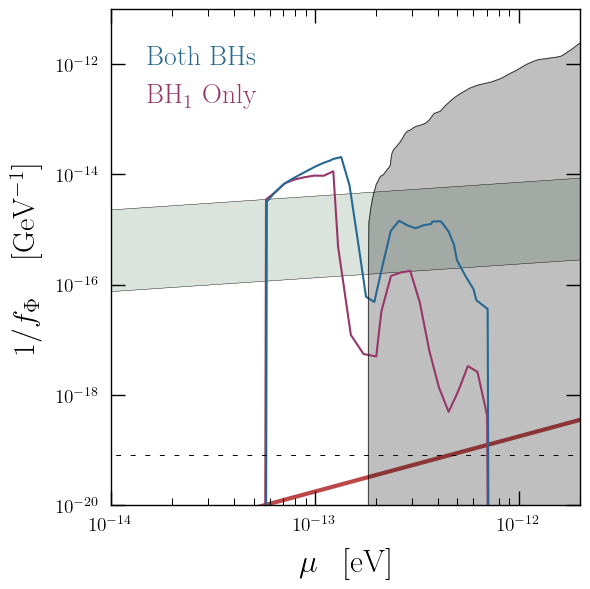

In [4]:
t2= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_100000.0_Nmax_5__FullRel__OneBH__KDE_.dat")
tOM= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_100000.0_Nmax_5__FullRel__KDE_.dat")


# t5= np.loadtxt("Lim_LIGO_GW231123_TauMax_1.0e6_Nmax_3__FullRel__KDE_.dat")
#t7= np.loadtxt("Lim_LIGO_GW231123_TauMax_1.0e6_Nmax_5__FullRel__KDE_.dat")

# t9= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_100000.0_Nmax_3__FullRel__KDE_.dat")
# t11= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_1.0e7_Nmax_3__FullRel__KDE_.dat")
# t13= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_1.0e7_Nmax_5__FullRel__KDE_.dat")
# t15= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_100000.0_Nmax_5__FullRel__KDE_.dat")




fig, axs = plt.subplots(1, figsize=(6,6))
axs.set_yscale("log")
axs.set_xscale("log")

axs.set_ylim([1e-20, 1e-11])
axs.set_xlim([1e-14, 2e-12])


axs.set_ylabel(r"$1/f_\Phi$  \, \, [GeV$^{-1}$]", fontsize=22)
axs.set_xlabel(r"$\mu$ \,  [eV] ", fontsize=23)

# axs.plot(t1[:,0], 1/10**t1[:,1], c="#084C61")
# axs.plot(t2[:,0], 1/10**t2[:,1], c="#DB3A34")
#axs.plot(t3[:,0], 1/10**t3[:,1], c="#276891", lw=1.5)
#axs.fill_between(t3[:,0], 1/10**t3[:,1], np.zeros_like(t3[:,1]), color='#276891', alpha=0.7)

wdw=4
ordd=2
lw=1.5

# axs.plot(t2[:,0], 1/10**t2[:,1], c="k")
x2x, y2x = get_lim(t2, wdw=wdw, ordd=ordd, thresh=np.log10(1e40), x1cut=5.5e-14, x2cut=1e100)
axs.plot(x2x, 1/10**y2x, c="#963669",  lw=lw)

wdw=3
ordd=1
lw=1.5

# axs.plot(tOM[:,0], 1/10**tOM[:,1], c="k")
x2x, y2x = get_lim(tOM, wdw=wdw, ordd=ordd)
axs.plot(x2x, 1/10**y2x,  c="#276891", lw=lw)



# x2x, y2x = get_lim(t13, wdw=wdw, ordd=ordd)
# axs.plot(x2x, 1/10**y2x,  c="k", lw=lw, ls=(0, (5, 10, 3)))



#axs.fill_between(x2x, 1/10**y2x, np.zeros_like(y2x), color='#276891', alpha=0.7)


axs.fill_between(std_const[:,0], std_const[:,1], np.zeros_like(std_const[:,1]), color='k', alpha=0.25)
axs.plot(std_const[:,0], std_const[:,1], c="k", lw=0.4)


EMD_lower = 1.448226539542627e-19*2*np.pi*137
EMD_upper = 2.6761051177154226e-18*2*np.pi*137
#ax.fill_between([1e-14, 1e-10],[EMD_upper,EMD_upper],[EMD_lower,EMD_lower],color='#8596c7',alpha=1,zorder=-100,edgecolor='k',lw=.8)

alPA=0.2
# Post-inflation ALP
def ALP_n0(m,theta_i=2.33,gstar_T1=90):
    fa_inv = np.sqrt(2*theta_i**2)/1.9e13*(m/1e-6)**(1/4)*(90/gstar_T1)**(1/8)
    return fa_inv

m = np.logspace(-14, -10, 1000)
eps = 0.1
axs.fill_between(m, ALP_n0(m,theta_i=0.1),ALP_n0(m,theta_i=np.pi-0.1),color='#4A7C59',alpha=alPA,lw=0,zorder=-10)
axs.plot(m,ALP_n0(m,theta_i=0.1),'k',lw=.3,zorder=-10)
axs.plot(m,ALP_n0(m,theta_i=np.pi-0.1),'k',lw=.3,zorder=-10)


def ALP_Cogenesis(m,C_agamma=1,T_EW=130,cb=0.1):
    g = C_agamma*1.8e-11*(0.1/cb)**0.5*(m/1e-3)**0.5*(130/T_EW)
    return g


shft=1.12
plt.plot(m,1/(1e12*(5.7e-6/m)),lw=3,color='#BC4749',zorder=-10,solid_capstyle='round', alpha=1)

# axs.text(1.2e-14, 10**-14.5, "ALP \n Misalign.", fontsize=15, c="#4A7C59", rotation=3);
# axs.text(5.0e-13, 1.7 * 10**-19, r"QCD axion", fontsize=15, c="#BC4749", rotation=15, zorder=11);

axs.text(1.5e-14, 10**-12, r"Both BHs", c="#276891", fontsize=20)
axs.text(1.5e-14, 2 * 10**-13, r"${\rm BH}_1$ Only",  c="#963669", fontsize=20)

axs.plot([1e-16, 1e-11],[1/1.22e19, 1/1.22e19], c="k", ls=(0, (5, 10)), lw=.7)
# axs.text(4e-13, 10**-12.1, r"X-rays", c="k", fontsize=19)
# axs.text(1.4e-14, 10**-19/3, r"$M_{\rm Pl}^{-1}$", c="k", fontsize=14)

plt.tight_layout()
plt.savefig("OneBH_analysis_n5.jpeg", dpi=200)

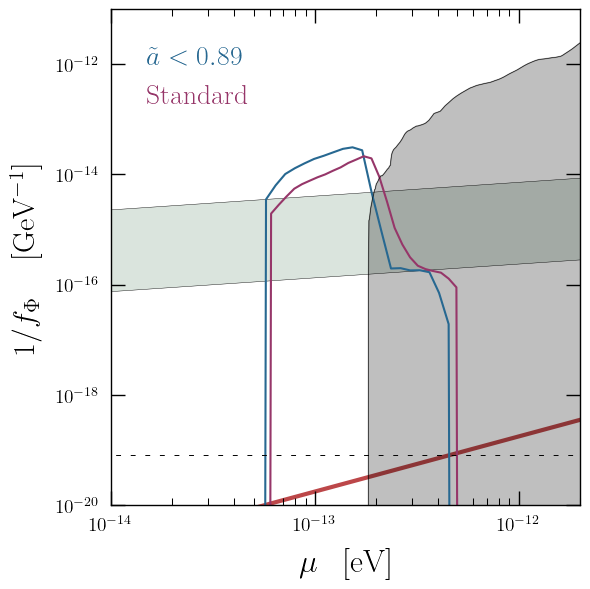

In [102]:
t2= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_100000.0_Nmax_3__FullRel__cuthighspin__KDE_.dat")
tOM= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_100000.0_Nmax_3__FullRel__KDE_.dat")


# t5= np.loadtxt("Lim_LIGO_GW231123_TauMax_1.0e6_Nmax_3__FullRel__KDE_.dat")
#t7= np.loadtxt("Lim_LIGO_GW231123_TauMax_1.0e6_Nmax_5__FullRel__KDE_.dat")

# t9= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_100000.0_Nmax_3__FullRel__KDE_.dat")
# t11= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_1.0e7_Nmax_3__FullRel__KDE_.dat")
# t13= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_1.0e7_Nmax_5__FullRel__KDE_.dat")
# t15= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_100000.0_Nmax_5__FullRel__KDE_.dat")




fig, axs = plt.subplots(1, figsize=(6,6))
axs.set_yscale("log")
axs.set_xscale("log")

axs.set_ylim([1e-20, 1e-11])
axs.set_xlim([1e-14, 2e-12])


axs.set_ylabel(r"$1/f_\Phi$  \, \, [GeV$^{-1}$]", fontsize=22)
axs.set_xlabel(r"$\mu$ \,  [eV] ", fontsize=23)

# axs.plot(t1[:,0], 1/10**t1[:,1], c="#084C61")
# axs.plot(t2[:,0], 1/10**t2[:,1], c="#DB3A34")
#axs.plot(t3[:,0], 1/10**t3[:,1], c="#276891", lw=1.5)
#axs.fill_between(t3[:,0], 1/10**t3[:,1], np.zeros_like(t3[:,1]), color='#276891', alpha=0.7)

wdw=3
ordd=1
lw=1.5

# axs.plot(t2[:,0], 1/10**t2[:,1], c="k")
x2x, y2x = get_lim(t2, wdw=wdw, ordd=ordd)
axs.plot(x2x, 1/10**y2x*1.3  ,  c="#276891", lw=lw)

x2x, y2x = get_lim(tOM, wdw=wdw, ordd=ordd)
axs.plot(x2x, 1/10**y2x,  c="#963669", lw=lw)



# x2x, y2x = get_lim(t13, wdw=wdw, ordd=ordd)
# axs.plot(x2x, 1/10**y2x,  c="k", lw=lw, ls=(0, (5, 10, 3)))



#axs.fill_between(x2x, 1/10**y2x, np.zeros_like(y2x), color='#276891', alpha=0.7)


axs.fill_between(std_const[:,0], std_const[:,1], np.zeros_like(std_const[:,1]), color='k', alpha=0.25)
axs.plot(std_const[:,0], std_const[:,1], c="k", lw=0.4)


EMD_lower = 1.448226539542627e-19*2*np.pi*137
EMD_upper = 2.6761051177154226e-18*2*np.pi*137
#ax.fill_between([1e-14, 1e-10],[EMD_upper,EMD_upper],[EMD_lower,EMD_lower],color='#8596c7',alpha=1,zorder=-100,edgecolor='k',lw=.8)

alPA=0.2
# Post-inflation ALP
def ALP_n0(m,theta_i=2.33,gstar_T1=90):
    fa_inv = np.sqrt(2*theta_i**2)/1.9e13*(m/1e-6)**(1/4)*(90/gstar_T1)**(1/8)
    return fa_inv

m = np.logspace(-14, -10, 1000)
eps = 0.1
axs.fill_between(m, ALP_n0(m,theta_i=0.1),ALP_n0(m,theta_i=np.pi-0.1),color='#4A7C59',alpha=alPA,lw=0,zorder=-10)
axs.plot(m,ALP_n0(m,theta_i=0.1),'k',lw=.3,zorder=-10)
axs.plot(m,ALP_n0(m,theta_i=np.pi-0.1),'k',lw=.3,zorder=-10)


def ALP_Cogenesis(m,C_agamma=1,T_EW=130,cb=0.1):
    g = C_agamma*1.8e-11*(0.1/cb)**0.5*(m/1e-3)**0.5*(130/T_EW)
    return g


shft=1.12
plt.plot(m,1/(1e12*(5.7e-6/m)),lw=3,color='#BC4749',zorder=-10,solid_capstyle='round', alpha=1)

# axs.text(1.2e-14, 10**-14.5, "ALP \n Misalign.", fontsize=15, c="#4A7C59", rotation=3);
# axs.text(5.0e-13, 1.7 * 10**-19, r"QCD axion", fontsize=15, c="#BC4749", rotation=15, zorder=11);

axs.text(1.5e-14, 10**-12, r"$\tilde{a} < 0.89$", c="#276891", fontsize=20)
axs.text(1.5e-14, 2 * 10**-13, r"Standard", c="#963669", fontsize=20)

axs.plot([1e-16, 1e-11],[1/1.22e19, 1/1.22e19], c="k", ls=(0, (5, 10)), lw=.7)
# axs.text(4e-13, 10**-12.1, r"X-rays", c="k", fontsize=19)
# axs.text(1.4e-14, 10**-19/3, r"$M_{\rm Pl}^{-1}$", c="k", fontsize=14)

plt.tight_layout()
plt.savefig("Spincut_analysis.jpeg", dpi=200)

In [303]:
t2= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_1.0e6_Nmax_3__FullRel__KDE_.dat")
t4= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_1.0e6_Nmax_5__FullRel__KDE_.dat")


t5= np.loadtxt("Lim_LIGO_GW231123_TauMax_1.0e6_Nmax_3__FullRel__KDE_.dat")

t7= np.loadtxt("Lim_LIGO_GW231123_TauMax_1.0e6_Nmax_5__FullRel__KDE_.dat")


t9= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_100000.0_Nmax_3__FullRel__KDE_.dat")
t10= np.loadtxt("Lim_LIGO_GW231123_TauMax_100000.0_Nmax_3__FullRel__KDE_.dat")

t11= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_1.0e7_Nmax_3__FullRel__KDE_.dat")
t12= np.loadtxt("Lim_LIGO_GW231123_TauMax_1.0e7_Nmax_3__FullRel__KDE_.dat")

t13= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_1.0e7_Nmax_5__FullRel__KDE_.dat")
t14= np.loadtxt("Lim_LIGO_GW231123_TauMax_1.0e7_Nmax_5__FullRel__KDE_.dat")


t15= np.loadtxt("Lim_LIGO_GW231123_NRSur_TauMax_100000.0_Nmax_5__FullRel__KDE_.dat")

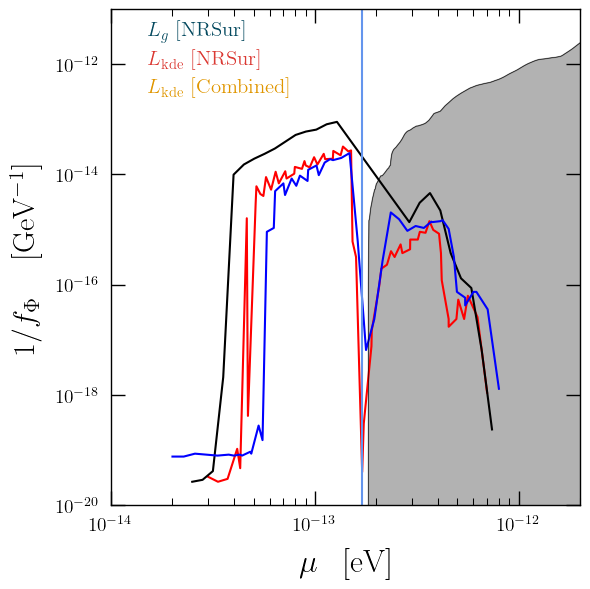

In [304]:
fig, axs = plt.subplots(1, figsize=(6,6))
axs.set_yscale("log")
axs.set_xscale("log")

axs.set_ylim([1e-20, 1e-11])
axs.set_xlim([1e-14, 2e-12])


axs.set_ylabel(r"$1/f_\Phi$  \, \, [GeV$^{-1}$]", fontsize=22)
axs.set_xlabel(r"$\mu$ \,  [eV] ", fontsize=23)

wdw=2
ordd=1

# axs.plot(t2[:,0], 1/10**t2[:,1], c="k")
#x2x, y2x = get_lim(t2, wdw=wdw, ordd=ordd)
#axs.plot(x2x, 1/10**y2x, c="r")

# axs.plot(t5[:,0], 1/10**t5[:,1], c="r")
#x2x, y2x = get_lim(t5, wdw=wdw, ordd=ordd)
#axs.plot(x2x, 1/10**y2x, c="k")

axs.plot(t4[:,0], 1/10**t4[:,1], c="r")
# axs.plot(t7[:,0], 1/10**t7[:,1], c="k")
# x2x, y2x = get_lim(t7, wdw=wdw, ordd=ordd)
# axs.plot(x2x, 1/10**y2x, c="k")


# axs.plot(t9[:,0], 1/10**t9[:,1], c="r")
# axs.plot(t10[:,0], 1/10**t10[:,1], c="k")

# axs.plot(t11[:,0], 1/10**t11[:,1], c="r")
# axs.plot(t12[:,0], 1/10**t12[:,1], c="r")
axs.plot(t13[:,0], 1/10**t13[:,1], c="k")
# axs.plot(t14[:,0], 1/10**t14[:,1], c="k")

axs.plot(t15[:,0], 1/10**t15[:,1], c="b")

# axs.plot(t11[:,0], 1/10**t11[:,1], c="r")


axs.vlines(1.7e-13, 0, 1)

# axs.plot(t1[:,0], 1/10**t1[:,1], c="#084C61")
# axs.plot(t3[:,0], 1/10**t3[:,1], c="#E09600")


# axs.plot(t6[:,0], 1/10**t6[:,1], c="b")
# axs.plot(t8[:,0], 1/10**t8[:,1], c="b")




# axs.plot(t13[:,0], 1/10**t13[:,1], c="r")



axs.fill_between(std_const[:,0], std_const[:,1], np.zeros_like(std_const[:,1]), color='k', alpha=0.3)
axs.plot(std_const[:,0], std_const[:,1], c="k", lw=0.4)


axs.text(1.5e-14, 10**-11.5, r"$L_g$ [NRSur]", c="#084C61", fontsize=15)
axs.text(1.5e-14, 10**-12, r"$L_{\rm kde}$ [NRSur]", c="#DB3A34", fontsize=15)
axs.text(1.5e-14, 10**-12.5, r"$L_{\rm kde}$ [Combined]", c="#E09600", fontsize=15)

# axs.text(4e-13, 10**-12.1, r"X-rays", c="k", fontsize=19)

plt.tight_layout()
# plt.savefig("Ppdot_default.jpeg", dpi=200)

In [319]:
hf211 = np.loadtxt("../test_store/binary_test_1.dat")
hf311 = np.loadtxt("../test_store/binary_test_2.dat")
hf322 = np.loadtxt("../test_store/binary_test_3.dat")
GN=7484169213.9427

[4.39379731e+07 1.69412636e+06 1.42796504e+05 1.97227193e+04
 3.83192644e+03 9.52019850e+02 2.83816861e+02 9.79366309e+01
 3.17615883e-01 3.17615883e-01] [4.36594747e+07 1.37929419e+06 9.42537811e+04 1.05316786e+04
 1.64488692e+03 3.29908860e+02 8.00750604e+01 2.26880602e+01
 7.33109265e+00 2.65049363e+00]


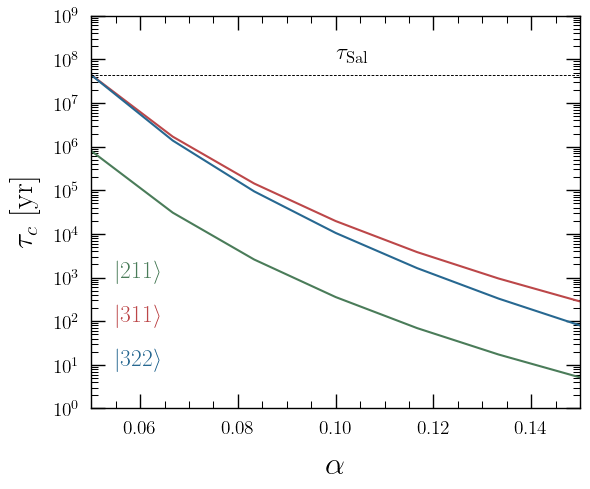

In [334]:
fig, axs = plt.subplots(1, figsize=(6,5))
axs.set_yscale("log")

# axs.set_ylim([1e-20, ])
axs.set_xlim([0.05, 0.15])
axs.set_ylim([1, 1e9])

M1 = 137
M2 = 103
tm211 = (5/256) * (hf211[:,1] * GN * M1)**4  / (GN**3 * (M1 * M2) * (M1 + M2)) * 6.58e-16 / 3.15e7 # yr
tm311 = (5/256) * (hf311[:,1] * GN * M1)**4  / (GN**3 * (M1 * M2) * (M1 + M2)) * 6.58e-16 / 3.15e7 # yr
tm322 = (5/256) * (hf322[:,1] * GN * M1)**4 / (GN**3 * (M1 * M2) * (M1 + M2))  * 6.58e-16 / 3.15e7 # yr

axs.set_ylabel(r"$\tau_c$  [yr]", fontsize=22)
axs.set_xlabel(r"$\alpha$ ", fontsize=23)

lw=1.5
axs.plot(hf211[:,0], tm211, c="#4A7C59", lw=lw)
axs.plot(hf311[:,0], tm311, c="#BC4749", lw=lw)
axs.plot(hf322[:,0], tm322, c="#276891", lw=lw)

print(tm311, tm322)
axs.axhline(4.5e7, color="k", lw=.7, ls="dashed")

axs.text(0.1, 10**8, r"$\tau_{\rm Sal}$", c="k", fontsize=17)

axs.text(0.055, 10**3, r"$\left| 211 \right>$ ", c="#4A7C59", fontsize=17)
axs.text(0.055, 10**2, r"$\left| 311 \right>$ ", c="#BC4749", fontsize=17)
axs.text(0.055, 10**1, r"$\left| 322 \right>$ ", c="#276891", fontsize=17)

plt.tight_layout()
plt.savefig("Binary_check.jpeg", dpi=200)

In [265]:
alpa / (GN * M1)

9.752946338244813e-14

In [296]:
M1 = 137
M2 = 100
rrt=1e4
alpa=0.1
GN=7484169213.9427
print((5/256) * (rrt * GN * M1)**4 / (GN**3 * (M1 * M2) * (M1 + M2))  * 6.58e-16 / 3.15e7) # yr
# 

3312.8542734580956


In [309]:
r_in_GM = 2.4e5 # R / (GM)
print((5/256) * (r_in_GM * GN * M1)**4 / (GN**3 * (M1 * M2) * (M1 + M2))  * 6.58e-16 / 3.15e7 / 1e9) # yr
r_in_GM = 1.1e5 # R / (GM)
print((5/256) * (r_in_GM * GN * M1)**4 / (GN**3 * (M1 * M2) * (M1 + M2))  * 6.58e-16 / 3.15e7 / 4.5e7) # yr

1.0991255394308324
1.077855542615555


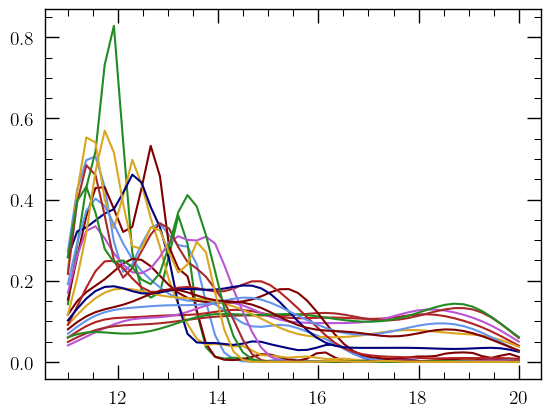

In [24]:
for i in range(20):
    kd1= np.loadtxt("KDE_{}.dat".format(i+1))

    plt.plot(kd1[:,0], kd1[:,1])

In [170]:
spin1 = np.loadtxt("../output_mcmc/LIGO_GW231123_NRSur_TauMax_100000.0_M_ax_1.0e-13_SPINONE__KDE__mcmc.dat")
spin1 = spin1[spin1 > -15]
spin1 = spin1[spin1 < -12]

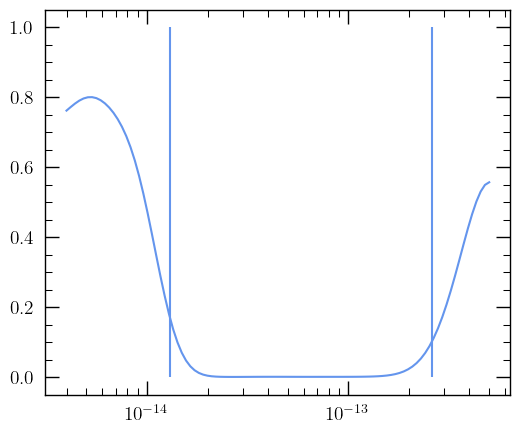

In [177]:
# plt.hist(spin1, bins=100, density=True);
from scipy.stats import gaussian_kde
out = gaussian_kde(spin1)
fig, axs = plt.subplots(1, figsize=(6,5))
xx = np.logspace(-14.4,-12.3, 100)
# print(out(np.log10(xx)))
plt.plot(xx, out(np.log10(xx)))
plt.xscale("log")
axs.vlines(1.3e-14, 0 , 1)
axs.vlines(2.6e-13, 0 , 1)
# plt.show()

In [180]:
xx = np.logspace(-15.1,-12, 100)
nrm = np.trapz(out(np.log10(xx)), np.log10(xx))
print(nrm)

xx1 = np.logspace(-14.5,-13, 100)
xx2 = np.logspace(-13,-12, 100)

tt = 0.1
x1hit = np.argmin(np.abs(out(np.log10(xx1)) - tt))
x1_new = xx1[:x1hit]


x2hit = np.argmin(np.abs(out(np.log10(xx2)) - tt))
x2_new = xx2[x2hit:]
print(x1_new, xx2[x2hit])
print(np.trapz(out(np.log10(x1_new)), np.log10(x1_new)) )
print(np.trapz(out(np.log10(x2_new)), np.log10(x2_new)) )

0.9918407446507815
[3.16227766e-15 3.27454916e-15 3.39080668e-15 3.51119173e-15
 3.63585086e-15 3.76493581e-15 3.89860370e-15 4.03701726e-15
 4.18034496e-15 4.32876128e-15 4.48244688e-15 4.64158883e-15
 4.80638086e-15 4.97702356e-15 5.15372466e-15 5.33669923e-15
 5.52617002e-15 5.72236766e-15 5.92553098e-15 6.13590727e-15
 6.35375264e-15 6.57933225e-15 6.81292069e-15 7.05480231e-15
 7.30527154e-15 7.56463328e-15 7.83320322e-15 8.11130831e-15
 8.39928706e-15 8.69749003e-15 9.00628020e-15 9.32603347e-15
 9.65713905e-15 1.00000000e-14 1.03550337e-14 1.07226722e-14
 1.11033632e-14 1.14975700e-14 1.19057724e-14 1.23284674e-14
 1.27661695e-14 1.32194115e-14 1.36887451e-14] 2.5950242113997317e-13
0.40466615652135624
0.19036655536518268


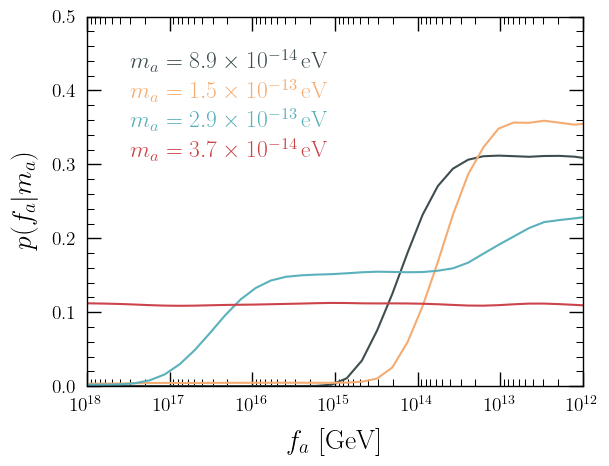

In [43]:
ordd=1
wdw=5

k1= np.loadtxt("KDE_29.dat")
k1_y = savgol_filter(k1[:,1], wdw, ordd) # window size 51, polynomial order 3
plt.plot(10**k1[:,0], k1_y, c="#3E4E50", lw=1.5)


k1= np.loadtxt("KDE_4.dat")
k1_y = savgol_filter(k1[:,1], wdw, ordd) # window size 51, polynomial order 3
plt.plot(10**k1[:,0], k1_y, c="#F5AC72", lw=1.5)


k1= np.loadtxt("KDE_10.dat")
k1_y = savgol_filter(k1[:,1], wdw, ordd) # window size 51, polynomial order 3
plt.plot(10**k1[:,0], k1_y, c="#5AB1BB", lw=1.5)


k1= np.loadtxt("KDE_15.dat")
k1_y = savgol_filter(k1[:,1], wdw, ordd) # window size 51, polynomial order 3
plt.plot(10**k1[:,0], k1_y, c="#CC444B", lw=1.5)


plt.text(3e17, 0.43, r"$m_a = 8.9 \times 10^{-14} \, {\rm eV}$ ", c="#3E4E50", fontsize=17)
plt.text(3e17, 0.39, r"$m_a = 1.5 \times 10^{-13} \, {\rm eV}$ ", c="#F5AC72", fontsize=17)
plt.text(3e17, 0.35, r"$m_a = 2.9 \times 10^{-13} \, {\rm eV}$ ", c="#5AB1BB", fontsize=17)
plt.text(3e17, 0.31, r"$m_a = 3.7 \times 10^{-14} \, {\rm eV}$ ", c="#CC444B", fontsize=17)

plt.xlim([1e18,1e12])
plt.ylim([0, 0.5])
plt.xscale("log")

plt.xlabel(r"$f_a$   [GeV]", fontsize=20)
plt.ylabel(r"$p(f_a | m_a)$", fontsize=20)
plt.savefig("posterior_fa.jpeg", dpi=200)

In [16]:
k1_y

array([11.        , 11.18367347, 11.45918367, 11.64285714, 11.82653061,
       12.01020408, 12.19387755, 12.37755102, 12.56122449, 12.74489796,
       12.92857143, 13.1122449 , 13.29591837, 13.47959184, 13.66326531,
       13.84693878, 14.03061224, 14.21428571, 14.39795918, 14.58163265,
       14.76530612, 14.94897959, 15.13265306, 15.31632653, 15.5       ,
       15.68367347, 15.86734694, 16.05102041, 16.23469388, 16.41836735,
       16.60204082, 16.78571429, 16.96938776, 17.15306122, 17.33673469,
       17.52040816, 17.70408163, 17.8877551 , 18.07142857, 18.25510204,
       18.43877551, 18.62244898, 18.80612245, 18.98979592, 19.17346939,
       19.35714286, 19.54081633, 19.7244898 , 19.81632653, 20.        ])